<a href="https://colab.research.google.com/github/Gonzales-Franz-Reinaldo/SIS420-AI/blob/main/Laboratorios/LAB-05/RN_regresion_logistica_mult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB-05 REDES NEURONALES - REGRESIÓN LOGÍSTICA MULTICLASE**

### Nombre: Gonzales Suyo Franz Reinaldo

### Carrera: Ing. de Sistemas

### C.U. 35-5335

# Implementación del modelo de regresión logística multiclase con una Red Neuronal

En este ejercicio implementaremos una red neuronal con regresion logistica multiclase y se aplica a dos diferentes datasets.

Nuestro objetuvo es predecir los número de label que son escritos del 0 al 9 en una imagen de 28x28 pixeles.
En el siguiente dataset **MNIST FGSM** `minist_train.csv` se encuentran todos los datos.

Link del Dataset: https://www.kaggle.com/datasets/sudulakishore/mnist-fgsm?select=mnist_train.csv

Link del Repositorio de GitHub LAB-05: https://github.com/Gonzales-Franz-Reinaldo/SIS420-AI/tree/main/Laboratorios/LAB-05

# **1. Preprocesamiento de los Datos**

## Información del Dataset

### MNIST FGSM

Un conjunto de datos similar al MNIST de 70.000 imágenes de 28 x 28 etiquetadas como Método de señalización de gradiente rápido


### Acerca del conjunto de datos

#### Contexto

MNIST-FGSM es un conjunto de datos de imágenes adversarias que consta de un conjunto de entrenamiento de 60.000 ejemplos y un conjunto de prueba de 10.000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28, asociada a una etiqueta de 10 clases. MNIST-FGSM tiene la intención de servir como un reemplazo directo del conjunto de datos original de MNIST para la evaluación comparativa de algoritmos de aprendizaje automático en ejemplos antagónicos. Comparte el mismo tamaño de imagen y la misma estructura de las divisiones de entrenamiento y prueba.

El conjunto de datos original de MNIST contiene una gran cantidad de dígitos escritos a mano. A los miembros de la comunidad de IA/ML/Data Science les encanta este conjunto de datos y lo utilizan como punto de referencia para validar sus algoritmos. De hecho, MNIST suele ser el primer conjunto de datos que intentan los investigadores. "Si no funciona en el MNIST, no funcionará en absoluto", dijeron. "Bueno, si funciona en el MNIST, aún puede fallar en otros".

Compruebe la precisión de sus modelos en este conjunto de datos y mejore la solidez adversaria de los modelos

#### Contenido

Cada imagen tiene 28 píxeles de alto y 28 píxeles de ancho, para un total de 784 píxeles en total. Cada píxel tiene un único valor de píxel asociado, que indica la claridad u oscuridad de ese píxel, y los números más altos significan más oscuro. Este valor de píxel es un número entero entre 0 y 255. Los conjuntos de datos de entrenamiento y prueba tienen 785 columnas. La primera columna consta de las etiquetas de clase (ver arriba) y representa un número entero. El resto de las columnas contienen los valores de píxel de la imagen asociada.

Para ubicar un píxel en la imagen, supongamos que hemos descompuesto x como x = i * 28 + j, donde i y j son números enteros entre 0 y 27. El píxel se encuentra en la fila i y la columna j de una matriz de 28 x 28.
Por ejemplo, 31 indica el píxel que está en la cuarta columna desde la izquierda y la segunda fila desde la parte superior, como en el diagrama ascii a continuación.

#### Descripción

. De las columnas: Cada fila es una imagen

. independiente, la columna 1 es la etiqueta de la clase (enteros del 0 al 9).

. Las columnas restantes son números de píxeles (784 en total).

. Cada valor es la oscuridad del píxel (de 1 a 255)

## Importación de las Librerias

In [ ]:

# Plotting library
from matplotlib import pyplot

# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt

import pandas as pd

# Modulo de optimización de scipy
from scipy import optimize

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# para aumentar datos en un dataset
from collections import Counter
from imblearn.over_sampling import SMOTE

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1 Obtención y Preparación de Datos:

In [ ]:
# Obtenemos los datos
df_train = pd.read_csv('/content/drive/MyDrive/SIS420-IA/Laboratorios/LAB-05/mnist_train.csv', delimiter=',')
df_test = pd.read_csv('/content/drive/MyDrive/SIS420-IA/Laboratorios/LAB-05/mnist_test.csv', delimiter=',')

# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 100)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

# Mostramos los datos de entrenamiento
df_train

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,5,25,25,25,24,24,25,25,25,25,17,13,25,25,25,23,1,9,25,25,25,25,25,25,17,0,15,25,25,25,25,25,12,12,24,25,25,25,25,25,25,25,25,25,20,9,25,25,25,20,25,25,25,15,1,20,25,25,25,25,12,0,20,25,25,25,25,25,25,25,25,25,20,5,16,16,23,1,16,18,25,25,9,20,25,25,25,25,12,8,22,13,25,25,25,25,25,15,24,12,10,0,0,0,20,1,0,2,12,19,9,10,24,25,25,25,12,16,25,1,25,25,25,25,25,19,28,0,0,4,12,11,9,47,33,29,10,12,9,0,8,25,25,25,22,23,9,0,5,5,5,24,47,55,74,28,39,86,111,103,52,173,209,172,115,42,21,4,0,25,25,25,25,25,24,1,28,48,31,74,151,199,240,239,240,235,233,228,200,247,252,199,101,39,25,24,1,23,25,25,24,24,24,26,70,175,212,218,221,223,227,226,253,255,231,149,110,67,42,65,36,25,23,25,3,1,20,21,15,18,9,0,10,154,204,212,226,227,216,159,189,218,188,74,36,37,0,4,21,10,0,20,20,0,0,5,20,25,18,1,3,61,103,122,210,236,162,33,26,58,70,19,12,16,0,0,0,0,0,12,1,0,0,0,6,12,2,0,0,5,18,53,175,248,137,0,0,3,8,2,0,0,0,0,0,0,0,0,11,16,12,0,0,0,0,0,0,0,0,38,143,238,201,36,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
# Datos de entrenamiento del 80%
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']


# Datos del prueba del 20 %
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

# Datos de X_train para el entrenamiento
print("Datos de X_train")
print(X_train)

print('=' * 100)

print("Datos de y_train")
print(y_train)

# Mostramos la cantidad de ejemplos que se utilizaran para el entrenamiento
print('=' * 100)
print("Cantidad de ejemplos del 80% para el entrenamiento es de: {:.0f}".format(len(X_train)))
print("Cantidad de ejemplos del 20% para la prueba es de: {:.0f}".format(len(X_test)))

Datos de X_train
        0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  \
0      25  25  25  24  24  25  25  25  25  17  13  25  25  25  23   1   9  25   
1       1  24  25  25  25  25  25  25  20   0   0  16  25  25   1   5  24  12   
2       0   0   0   0   0   0   0   0   5  25  12   0   0   0   0   5  25  25   
3      25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  13   
4       0   0   0  11   8   0   0   1  18   1   0  16  25  25  25  20   9  23   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
24995  25  25  16   0  16  25  25  25  24  25  12   0   0   0   0   5  17   0   
24996  23  18   0  11  23  25  23  23  25  25  25  25  25  25  23   5  24  25   
24997  25  25  25  25  25   5   0   0   0   0  11  23   5   0   0   0   8  24   
24998  25  25  25  24  24  25  25  25  25  17  13  25  25  25  25  20   9  25   
24999   0   0   0   0   0   0   0   0   0   0   0  15  25  25  23   6  16   0   

       18 

In [ ]:
# Mostramos cuantas clases tinene la columna de "Y" labels
df_train['label'].value_counts()

label
1    2849
7    2597
3    2592
9    2510
0    2472
6    2462
2    2450
4    2445
8    2388
5    2235
Name: count, dtype: int64

In [ ]:
# Mostramos los datos de entrenamiento X_train
print("Datos de entrenamiento")
X_train

Datos de entrenamiento


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,25,25,25,24,24,25,25,25,25,17,13,25,25,25,23,1,9,25,25,25,25,25,25,17,0,15,25,25,25,25,25,12,12,24,25,25,25,25,25,25,25,25,25,20,9,25,25,25,20,25,25,25,15,1,20,25,25,25,25,12,0,20,25,25,25,25,25,25,25,25,25,20,5,16,16,23,1,16,18,25,25,9,20,25,25,25,25,12,8,22,13,25,25,25,25,25,15,24,12,10,0,0,0,20,1,0,2,12,19,9,10,24,25,25,25,12,16,25,1,25,25,25,25,25,19,28,0,0,4,12,11,9,47,33,29,10,12,9,0,8,25,25,25,22,23,9,0,5,5,5,24,47,55,74,28,39,86,111,103,52,173,209,172,115,42,21,4,0,25,25,25,25,25,24,1,28,48,31,74,151,199,240,239,240,235,233,228,200,247,252,199,101,39,25,24,1,23,25,25,24,24,24,26,70,175,212,218,221,223,227,226,253,255,231,149,110,67,42,65,36,25,23,25,3,1,20,21,15,18,9,0,10,154,204,212,226,227,216,159,189,218,188,74,36,37,0,4,21,10,0,20,20,0,0,5,20,25,18,1,3,61,103,122,210,236,162,33,26,58,70,19,12,16,0,0,0,0,0,12,1,0,0,0,6,12,2,0,0,5,18,53,175,248,137,0,0,3,8,2,0,0,0,0,0,0,0,0,11,16,12,0,0,0,0,0,0,0,0,38,143,238,201,36,0,0,0,0,0,0,0,0,0,0,0,0,8,25,24

In [ ]:
# Imprimos todas las clases o labels que contiene la columna de y_train
from collections import Counter

num_clases = len(np.unique(y_train))
print("Número de clases:", num_clases)


# Conteo de datos por clase
conteo_clases = dict(Counter(y_train))

# Imprimir el conteo de datos por clase
print("Clases podrían ser:")
for clase, conteo in conteo_clases.items():
    print(f"{clase} : {conteo} datos")

Número de clases: 10
Clases podrían ser:
5 : 2235 datos
0 : 2472 datos
4 : 2445 datos
1 : 2849 datos
9 : 2510 datos
2 : 2450 datos
3 : 2592 datos
6 : 2462 datos
7 : 2597 datos
8 : 2388 datos


## **2. Visualización de los Datos**

In [ ]:

def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una bonita cuadrícula.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n // example_width  # Cambié esto a división entera

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        # Display Image
        h = ax.imshow(X.iloc[i].values.reshape(example_width, example_width),
                      cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')


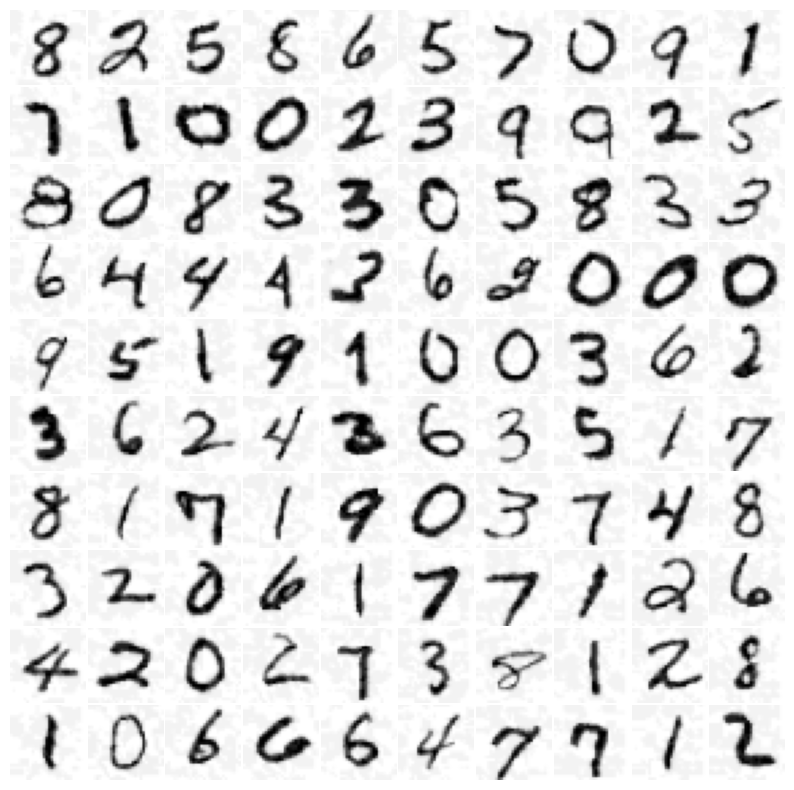

In [ ]:
# Número de ejemplos de entrenamiento
m = y_train.size
# Se seleccionan 100 datos para ser visualizados
rand_indices = np.random.choice(m, 100, replace=False)
sel = X_train.iloc[rand_indices, :]  # Corregí aquí utilizando iloc
displayData(sel)
plt.show()

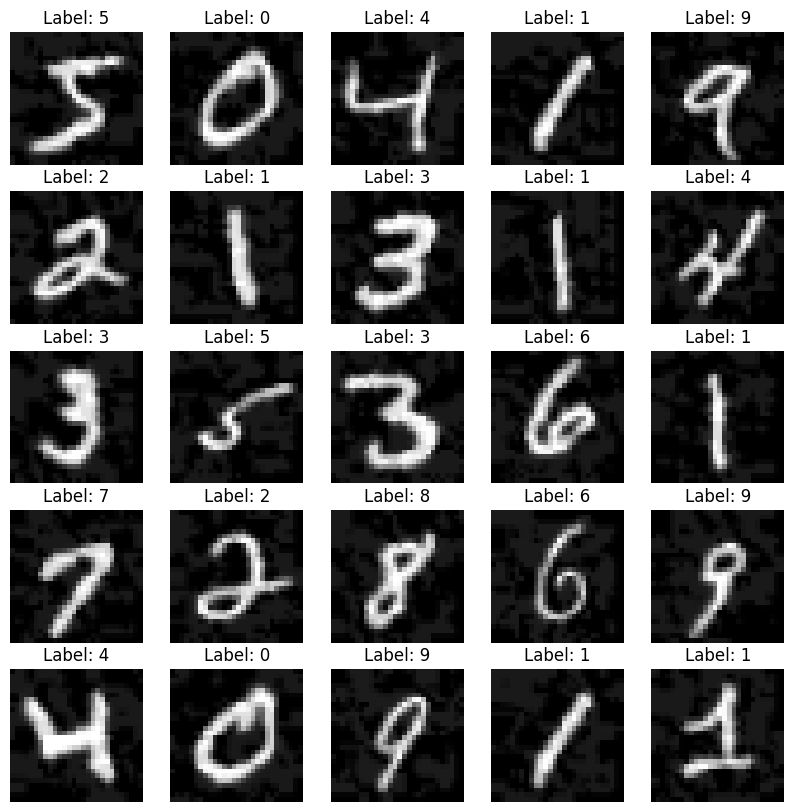

In [ ]:
# Visualizar algunas imágenes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y_train.iloc[i]}')
    plt.axis('off')
plt.show()

#Normalización de los Datos para el Entrenamiento y de Prueba

In [ ]:
# Creamos el objeto StandardScaler
scaler = StandardScaler()

# Ajustamos y transformamos los datos de entrenamiento
X_train_norm = scaler.fit_transform(X_train)

# Transformamos los datos de prueba (no ajustamos nuevamente)
X_test_norm = scaler.transform(X_test)


In [ ]:
# Mostramos los datos normalizados
print("Datos de entrenamiento normalizados")
print(X_train_norm)
print("Datos de prueba normalizados")
print(X_test_norm)


Datos de entrenamiento normalizados
[[ 0.98860299  1.00189726  0.99301697 ... -0.42163959 -0.3274133
  -0.2390335 ]
 [-0.96636845  0.91954178  0.99301697 ... -0.42163959 -0.3274133
  -0.2390335 ]
 [-1.0478256  -1.05698978 -1.12863282 ... -0.42163959 -0.3274133
  -0.2390335 ]
 ...
 [ 0.98860299  1.00189726  0.99301697 ... -0.42163959 -0.3274133
  -0.2390335 ]
 [ 0.98860299  1.00189726  0.99301697 ... -0.42163959 -0.3274133
  -0.2390335 ]
 [-1.0478256  -1.05698978 -1.12863282 ... -0.42163959 -0.3274133
  -0.2390335 ]]
Datos de prueba normalizados
[[-1.0478256  -1.05698978 -1.12863282 ... -0.42163959 -0.3274133
  -0.2390335 ]
 [-1.0478256  -1.05698978 -1.12863282 ... -0.42163959  3.48663657
   4.39512299]
 [ 0.82568871  0.83718629  0.82328499 ... -0.42163959 -0.3274133
  -0.2390335 ]
 ...
 [ 0.98860299  1.00189726  0.99301697 ... -0.42163959 -0.3274133
  -0.2390335 ]
 [ 0.98860299  1.00189726  0.99301697 ... -0.42163959 -0.3274133
  -0.2390335 ]
 [-1.0478256  -1.05698978 -1.12863282 ...  

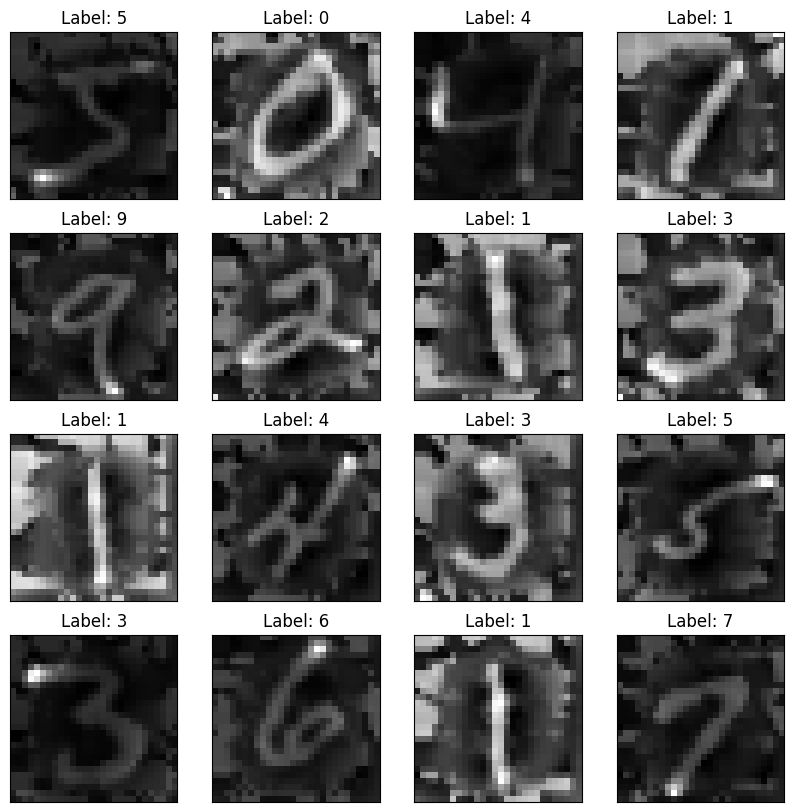

In [ ]:
# Visualización de etiquetas con datos normalizadas
# Función para mostrar imágenes de MNIST con etiquetas
def plot_images(images, labels, nrows, ncols, figsize=(10, 10)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        # Mostrar imagen
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_xticks([]); ax.set_yticks([])  # Eliminar marcas de ejes
        ax.set_title(f"Label: {labels[i]}")  # Mostrar la etiqueta

# Seleccionar algunas imágenes normalizadas y sus etiquetas para mostrar
num_images_to_show = 16
images_to_show = X_train_norm[:num_images_to_show]
labels_to_show = y_train[:num_images_to_show]

# Graficar las imágenes con sus etiquetas
plot_images(images_to_show, labels_to_show, nrows=4, ncols=4)
plt.show()

## **3. Construcción del Modelo de Red Neuronal**

### 3.1 Definición de Capas

La red neuronal tiene 3 capas: una capa de entrada, una capa oculta y una capa de salida. Las entradas son valores de píxeles de digitos de imagenes. Dado que las imágenes tienen un tamaño de $28 \times 28$, esto nos da 784 unidades de capa de entrada (sin contar la unidad de oscilación adicional que siempre genera +1). Los datos de entrenamiento se cargaron en las variables `X` y `y` anteriores.

Los parámetros tienen dimensiones que están dimensionadas para una red neuronal con 25 unidades en la segunda capa y 10 unidades de salida (correspondientes a las clases de 10 dígitos ya que van de 0 a 9).

In [ ]:
print("X_train shape:", X_train_norm.shape)
print("X_test shape:", X_test_norm.shape)

X_train shape: (25000, 784)
X_test shape: (10000, 784)


In [ ]:
# Contrucción del modelo de red neuronal
# Configuración de parámetros necesario
input_layer_size  = 784  # Entrada de imagenes de digitos de 28x28, caracteristicas
hidden_layer_size = 10   # 10 hidden units, neuronas ocultas, capa uculta
num_labels = 10         # 10 etiquetas, labels del 0 al 9


# carga los pesos en las variables Theta1 y Theta2
pesos = {}
pesos['Theta1'] = np.random.rand(hidden_layer_size, input_layer_size + 1) # 10, 785
pesos['Theta2'] = np.random.rand(num_labels, hidden_layer_size + 1)  # 10, 11

Theta1 = pesos['Theta1']
Theta2 = pesos['Theta2']

# Desenrollar parámetros
print(Theta1.ravel().shape)  # ravel() para convertir los pesos de una matriz a un vector
print(Theta2.ravel().shape)

nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()])
print(nn_params.shape)

(7850,)
(110,)
(7960,)


### 3.2 Función de Activación

La principal diferencia es que, en el modelo de `regresión logísitca`, utilizaremos una función de activación conocida como `Sigmoid`.

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

In [ ]:
# Función de activación
def sigmoid(z):
    """
    Computes the sigmoid of z.
    """
    return 1.0 / (1.0 + np.exp(-z))


def sigmoidGradient(z):

    g = np.zeros(z.shape)

    g = sigmoid(z) * (1 - sigmoid(z))

    return g

### 3.3 Función de Pérdida (Costo) y Descenso del Gradiente

Podríamos intentar entrenar nuestro modelo de `regresión logísitca multiclase` con la función de pérdida que ya conocemos. Sin embargo. Esta función es conocida como *Cross Entropy*.

Ahora se implementa la funcion de costo y gradiente para la red neuronal `nnCostFunction`.

La función de costo para la red neuronal (con regularización) es:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}\sum_{k=1}^{K} \left[ - y_k^{(i)} \log \left( \left( h_\theta \left( x^{(i)} \right) \right)_k \right) - \left( 1 - y_k^{(i)} \right) \log \left( 1 - \left( h_\theta \left( x^{(i)} \right) \right)_k \right) \right] + \frac{\lambda}{2 m} \left[ \sum_{j=1}^{25} \sum_{k=1}^{400} \left( \Theta_{j,k}^{(1)} \right)^2 + \sum_{j=1}^{10} \sum_{k=1}^{25} \left( \Theta_{j,k}^{(2)} \right)^2 \right] $$

In [ ]:
# Definimos la función
# Esta función calcula la función de costo y los gradientes para una red neuronal de dos capas (una capa oculta)
# utilizada en un problema de regresión logística multiclase.

def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_):

    # Reformar nn_params nuevamente en los parámetros Theta1 y Theta2, las matrices de peso
    # para nuestra red neuronal de 2 capas

    #? Los primeros 150 elementos de nn_params se utilizan para llenar la matriz Theta1,
    # que tendrá dimensiones 10 x 785 (10 filas y 785 columnas).
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                        (hidden_layer_size, (input_layer_size + 1)))

    #? Los elementos apartir de 160 de nn_params se utilizan para llenar la matriz Theta2,
    # entonces 160 elementos que tendrá dimensiones 10 x 16 (10 filas y 16 columnas.
    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                        (num_labels, (hidden_layer_size + 1)))

    m = y.size

    J = 0

    #? Inicializamos matrices para almacenar los gradientes
    Theta2_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)

    a1 = np.concatenate([np.ones((m, 1)), X], axis=1)

    a2 = sigmoid(a1.dot(Theta1.T))
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)

    a3 = sigmoid(a2.dot(Theta2.T))

    y_matrix = y.reshape(-1)
    y_matrix = np.eye(num_labels)[y_matrix]

    temp1 = Theta1
    temp2 = Theta2


    #? Calculo de la función de costo con termino de regularización

    regularizacion = (lambda_ / (2 * m)) * (np.sum(np.square(temp1[:, 1:])) + np.sum(np.square(temp2[:, 1:])))

    J = (-1 / m) * np.sum((y_matrix * np.log(a3)) + (1 - y_matrix) * np.log(1 - a3)) + regularizacion


    #? Backpropagation

    # calcula el error en la capa de salida.
    delta_3 = a3 - y_matrix
    # calcula el error en la capa oculta propagando hacia atrás el error desde la capa de salida.
    delta_2 = delta_3.dot(Theta2)[:, 1:] * sigmoidGradient(a1.dot(Theta1.T))

    # Acumuladores de los gradientes de los pesos Theta1 y Theta2 respectivamente.
    Delta1 = delta_2.T.dot(a1)
    Delta2 = delta_3.T.dot(a2)

    # Agregar regularización al gradiente

    Theta1_grad = (1 / m) * Delta1
    Theta1_grad[:, 1:] = Theta1_grad[:, 1:] + (lambda_ / m) * Theta1[:, 1:]

    Theta2_grad = (1 / m) * Delta2
    Theta2_grad[:, 1:] = Theta2_grad[:, 1:] + (lambda_ / m) * Theta2[:, 1:]

    # Toodas las gradientes

    grad = np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel()])

    return J, grad


#### Pruebando el funcionamiento de la función de costo

In [ ]:
lambda_ = 0.1

J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,  num_labels, X_train_norm, y_train.values, lambda_)
print("Costo en parámetros (Cargado): %.f " % J)
print('El costo debe esta cercano a          : 0.287629')

Costo en parámetros (Cargado): 30 
El costo debe esta cercano a          : 0.287629


### Inicializamso la función para inicializar los pesos

La función randInitializeWeights se utiliza para inicializar aleatoriamente los pesos de una capa en una red neuronal. Esta inicialización aleatoria es crucial para evitar que todos los pesos comiencen con el mismo valor y se sincronicen durante el entrenamiento, lo que puede llevar a problemas de simetría y convergencia inadecuada durante el aprendizaje.

In [ ]:
# Inicializamos los pesos de la red neuronal de forma aleatoria utilizando la función randInitializeWeights
def randInitializeWeights(L_in, L_out, epsilon_init = 0.12):

    """
        Inicializa aleatoriamente los pesos de una capa en una red neuronal.

        Parámetros
        ----------
        L_in:int
        Número de conexiones entrantes.

        L_salida: int
        Número de conexiones salientes.

        epsilon_init: flotante, opcional
        Rango de valores que puede tomar el peso de un uniforme
        distribución.

        Devoluciones
        -------
        W: tipo matriz
        El peso inicializado a valores aleatorios. Tenga en cuenta que W debería
        establecerse en una matriz de tamaño (L_out, 1 + L_in) como
        la primera columna de W maneja los términos de "sesgo".
    """

    """
    . Se crea una matriz W de dimensiones (L_out, 1 + L_in) inicializada con ceros.
    . L_out: representa el número de neuronas en la capa actual (conexiones salientes).
    . 1 + L_in: se refiere al número de entradas a cada neurona, incluyendo un término de "sesgo" (bias) que corresponde a la primera columna de la matriz W.
    """

    # Creamos una matriz con las dimensiones
    W = np.zeros((L_out, 1 + L_in))
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init

    return W

In [ ]:
# Llamamos a la funcion para inicializar los thetas aleatoriamente
print("Inicialización de parámetros de redes neuronales...")

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Desenrrollar parámetos
initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)

Inicialización de parámetros de redes neuronales...


## 3.4 Backpropagation

Ahora, se implementará el algoritmo de retropropagación. Recuerde que la intuición detrás del algoritmo de retropropagación es la siguiente. Dado un ejemplo de entrenamiento $(x^{(t)}, y^{(t)})$, primero ejecutaremos un "pase hacia adelante" para calcular todas las activaciones en toda la red, incluido el valor de salida de la hipótesis $h_\theta(x)$. Luego, para cada nodo $j$ en la capa $l$, se busca calcular un "término de error" $\delta_j^{(l)}$ que mide cuánto ese nodo fue "responsable" de cualquier error en la salida.

### 3.4  Comprobación del gradiente

En la red neuronal, se está minimizando la función de costo $J(\Theta)$. Para realizar una verificación de gradiente en sus parámetros, se puede imaginar "desenrollar" los parámetros $\Theta^{(1)}$, $\Theta^{(2)}$ en un vector largo $\theta$. Al hacerlo, se puede pensar que la función de costo es $J(\Theta)$ y usar el siguiente procedimiento de verificación de gradiente.


** Consejo práctico **: al realizar la verificación de gradientes, es mucho más eficiente utilizar una pequeña red neuronal con un número relativamente pequeño de unidades de entrada y unidades ocultas, por lo que tiene un número relativamente pequeño
de parámetros. Cada dimensión de $\theta$ requiere dos evaluaciones de la función de costo y esto puede resultar costoso. En la función `checkNNGradients`, nuestro código crea un pequeño modelo aleatorio y un conjunto de datos que se usa con `computeNumericalGradient` para verificar el gradiente. Además, una vez que esté seguro de que sus cálculos de gradiente son correctos, debe desactivar la verificación de gradiente antes de ejecutar su algoritmo de aprendizaje.


** Sugerencia práctica: ** La verificación del gradiente funciona para cualquier función en la que esté calculando el costo y el gradiente. Concretamente, puede usar la misma función `computeNumericalGradient` para verificar si sus implementaciones de gradiente para los otros ejercicios también son correctas (por ejemplo, la función de costo de regresión logística).

In [ ]:
#? Function para depurar Inicializar pesos
def debugInitializeWeights(fan_out, fan_in):
    """
    Inicializar los pesos de una capa con conexiones entrantes fan_in y salidas fan_out
    conexiones usando una estrategia fija. Esto le ayudará más adelante en la depuración.

    Tenga en cuenta que W debe establecerse como una matriz de tamaño (1+fan_in, fan_out) como la primera fila de W maneja
    los términos de "sesgo".

    Parámetros
    ----------
    fan_out: int
    El número de conexiones salientes.

    fan_in: int
    El número de conexiones entrantes.

    Devoluciones
    -------
    W: array_like (1+fan_in, fan_out)
    La matriz de pesos inicializada dadas las dimensiones.
    """
    # Initialize W using "sin". This ensures that W is always of the same values and will be
    # useful for debugging
    W = np.sin(np.arange(1, 1 + (1+fan_in)*fan_out))/10.0
    W = W.reshape(fan_out, 1+fan_in, order='F')

    return W


#? Función para calcular gradiente numérico
def computeNumericalGradient(J, theta, e=1e-4):
    """
    Calcula el gradiente usando "diferencias finitas" y nos da una estimación numérica del
    degradado.

    Parámetros
    ----------
    J: función
    La función de costo que se utilizará para estimar su gradiente numérico.

    theta: tipo matriz
    Los parámetros de red unidimensionales desenrollados. El gradiente numérico se calcula en
    esos parámetros dados.

    e: flotante (opcional)
    El valor que se utilizará para épsilon para calcular la diferencia finita.

    Notas
    -----
    El siguiente código implementa la verificación de gradiente numérico y
    devuelve el gradiente numérico. Establece `numgrad[i]` en (un valor numérico
    aproximación de) la derivada parcial de J con respecto a la
    i-ésimo argumento de entrada, evaluado en theta. (es decir, `numgrad[i]` debería
    ser (aproximadamente) la derivada parcial de J con respecto
    a theta[i].)
    """
    numgrad = np.zeros(theta.shape)
    perturb = np.diag(e * np.ones(theta.shape))
    for i in range(theta.size):
        loss1, _ = J(theta - perturb[:, i])
        loss2, _ = J(theta + perturb[:, i])
        numgrad[i] = (loss2 - loss1)/(2*e)

    return numgrad


#? Función para comprobar gradientes NN
def checkNNGradients(nnCostFunction, lambda_=0):
    """
    Crea una pequeña red neuronal para comprobar los gradientes de retropropagación. Dará salida al
    gradientes analíticos producidos por su código backprop y los gradientes numéricos
    (calculado usando ComputeNumericalGradient). Estos dos cálculos de gradiente deberían dar como resultado
    valores muy similares.

    Parámetros
    ----------
    nnCostoFunción: func
    Una referencia a la función de costos implementada por el estudiante.

    lambda_: flotante (opcional)
    El valor del parámetro de regularización.
    """
    input_layer_size = 784
    hidden_layer_size = 10
    num_labels = 10
    m = 10

    # We generate some 'random' test data
    Theta1 = debugInitializeWeights(hidden_layer_size, input_layer_size)
    Theta2 = debugInitializeWeights(num_labels, hidden_layer_size)

    # Reusing debugInitializeWeights to generate X
    X = debugInitializeWeights(m, input_layer_size - 1)
    y = np.arange(1, 1+m) % num_labels
    # print(y)
    # Unroll parameters
    nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()])

    # short hand for cost function
    costFunc = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size,
                                        num_labels, X, y, lambda_)
    cost, grad = costFunc(nn_params)
    numgrad = computeNumericalGradient(costFunc, nn_params)

    # Visually examine the two gradient computations.The two columns you get should be very similar.
    print(np.stack([numgrad, grad], axis=1))
    print('Las dos columnas anteriores que obtenga deberían ser muy similares.')
    print('(Izquierda: su gradiente numérico, gradiente analítico derecho)\n')

    # Evaluate the norm of the difference between two the solutions. If you have a correct
    # implementation, and assuming you used e = 0.0001 in computeNumericalGradient, then diff
    # should be less than 1e-9.
    diff = np.linalg.norm(numgrad - grad)/np.linalg.norm(numgrad + grad)

    print('Si su implementación de retropropagación es correcta, entonces \n'
          'la diferencia relativa será pequeña (menos de 1e-9).. \n'
          'Diferencia relativa: %g' % diff)


In [ ]:
# Realizamos la prueba de la función
checkNNGradients(nnCostFunction)

[[-3.37318677e-03 -3.37318676e-03]
 [-1.67514727e-04 -1.67514741e-04]
 [-1.76214878e-04 -1.76214884e-04]
 ...
 [ 1.89972756e-01  1.89972756e-01]
 [ 2.10629028e-01  2.10629028e-01]
 [ 2.06919734e-01  2.06919734e-01]]
Las dos columnas anteriores que obtenga deberían ser muy similares.
(Izquierda: su gradiente numérico, gradiente analítico derecho)

Si su implementación de retropropagación es correcta, entonces 
la diferencia relativa será pequeña (menos de 1e-9).. 
Diferencia relativa: 1.44886e-10


Un ejemplo de forma regularizada

In [ ]:
# Verificamos los gradientes ejecutando checkNNGradients
lambda_ = 0.1
checkNNGradients(nnCostFunction, lambda_)

# También genera los valores de depuración de costFunction
debug_J, _  = nnCostFunction(nn_params, input_layer_size,
                          hidden_layer_size, num_labels, X_train_norm, y_train.values, lambda_)

print('\n\nCosto en parámetros de depuración (fijos) (w/ lambda = %f): %f ' % (lambda_, debug_J))
print('(for lambda = 2, this value should be about 0.576051)')

[[-0.00337319 -0.00337319]
 [-0.0011675  -0.0011675 ]
 [ 0.00066044  0.00066044]
 ...
 [ 0.19086675  0.19086675]
 [ 0.21012266  0.21012266]
 [ 0.20687549  0.20687549]]
Las dos columnas anteriores que obtenga deberían ser muy similares.
(Izquierda: su gradiente numérico, gradiente analítico derecho)

Si su implementación de retropropagación es correcta, entonces 
la diferencia relativa será pequeña (menos de 1e-9).. 
Diferencia relativa: 1.52049e-10


Costo en parámetros de depuración (fijos) (w/ lambda = 0.100000): 29.554217 
(for lambda = 2, this value should be about 0.576051)


## **4. Entrenamiento del Modelo**

In [ ]:
# Entrenamiento del modelo

# Después de haber completado la tarea, cambie el maxiter a uno más grande
#? valor para ver cómo ayuda más formación.
# Especifica el número máximo de iteraciones que el algoritmo de optimización
options = {'maxiter': 50}

#? Probar con diferentes valores de lambda
lambda_ = 0.1

#? Cree una "taquigrafía" para minimizar la función de costos.
#? Ahora, costFunction es una función que toma solo un argumento.
costFunction = lambda p: nnCostFunction(p, input_layer_size,
                                        hidden_layer_size,
                                        num_labels, X_train_norm, y_train.values, lambda_)

#? Ahora, costFunction es una función que toma solo un argumento.
#? (los parámetros de la red neuronal)

res = optimize.minimize(costFunction,
                        initial_nn_params,
                        jac=True,
                        method='TNC',
                        options=options)

#? obtenemos la solución de la optimización
nn_params = res.x

#? Obtenemos Theta1 y Theta2 de nn_params
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                    (hidden_layer_size, (input_layer_size + 1)))

Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                    (num_labels, (hidden_layer_size + 1)))

<ipython-input-28-44512039365b>:20: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,
<ipython-input-17-2a0ab17c5f3d>:46: RuntimeWarning: divide by zero encountered in log
  J = (-1 / m) * np.sum((y_matrix * np.log(a3)) + (1 - y_matrix) * np.log(1 - a3)) + regularizacion
<ipython-input-17-2a0ab17c5f3d>:46: RuntimeWarning: invalid value encountered in multiply
  J = (-1 / m) * np.sum((y_matrix * np.log(a3)) + (1 - y_matrix) * np.log(1 - a3)) + regularizacion


In [ ]:
""" Mostramos las thetas1 """
print(Theta1)

[[-0.23917403 -0.8320378  -0.50527759 ... -0.35200077  0.06344151
  -0.01764063]
 [ 0.35287592  0.31962634 -0.59805066 ... -0.16188196  0.02709206
  -0.80769087]
 [ 1.72825042  1.01857094  0.4566484  ...  0.29278802 -0.68552693
  -0.02063767]
 ...
 [-6.56945828  0.12494817  0.03352231 ... -0.52435715 -1.05261729
  -0.23190081]
 [-1.0579715  -0.44888668 -0.26751418 ...  0.20560787  0.61968776
  -0.55973836]
 [ 0.28024157 -0.27512239 -0.54689992 ...  0.44351825 -0.99798235
   0.81205868]]


In [ ]:
""" Mostramos las thetas2 """
print(Theta2)

[[-10.29610401   2.75631945  -5.67489644  -8.02613522  -0.06005873
   -5.42244578   4.68574516  -1.9156703    8.54231769   1.53019052
    1.15878102]
 [-10.70552675   4.82253229  -0.49724698   5.13433765  -8.22547664
    3.23147456  -8.43747759   5.4223689   -0.48772497   2.23583266
   -7.16217446]
 [-15.24649101   7.0574877   -3.99178626   7.57915353   6.24979143
   -4.01842773   3.44187916   3.02681404  -2.11710702  -5.82132198
    0.09090854]
 [ -9.19423026  -8.82856412  -3.56296138   4.17195398  -8.55277602
    6.05536123   2.03073422   2.31757308   3.1470466   -1.18971306
    3.55310373]
 [-11.07632083  -6.31803336   3.80389969  -6.35839355   5.89931732
    1.70696058  -6.19545993   6.46811495  -5.7637871   -3.9241506
    3.83605491]
 [ -6.15511261  -4.71064355   5.8676383   -1.3667593   -1.65252786
  -10.37654055   5.67400866   2.40460535  -4.25377789   5.94295616
   -6.21733625]
 [ -7.22279079   4.42460577  -5.33525931  -5.15654356  -0.74962654
   -2.11020834  -7.32968567  -1.60

In [ ]:
print(Theta1.shape)
print(Theta2.shape)

(10, 785)
(10, 11)


## **5. Evaluación del Modelo**

Una vez que termine el entrenamiento, procederemos a informar la precisión del entrenamiento de tu clasificador calculando el porcentaje de ejemplos que ha acertado. Si tu implementación es correcta, deberías ver una precisión de entrenamiento de alrededor del 95.3% (esto puede variar en aproximadamente un 1% debido a la inicialización aleatoria). Es posible obtener precisión de entrenamiento más alta entrenando la red neuronal durante más iteraciones. Te animamos a intentar entrenar la red neuronal durante más iteraciones (por ejemplo, establece maxiter en 400) y también varía el parámetro de regularización λ. Con la configuración de aprendizaje adecuada, es posible que la red neuronal se ajuste perfectamente al conjunto de entrenamiento.

## 5.1 Predicciónes

Realizamos la evaluación del modelo esta vez con las predicciones con los datos de prueba del 20% aplicado para las pruebas de predicciones de X_test

In [ ]:

# Inicializamos la función de predicción para predecir la etiqueta de una entrada dada una red neuronal entrenada
def predict(Theta1, Theta2, X):
    """
    Predecir la etiqueta de una entrada dada una red neuronal entrenada
    Genera la etiqueta predicha de X dados los pesos entrenados de un neural
    red (Theta1, Theta2)
    """

    #? Inicializamos los valores útiles
    m = X.shape[0]
    num_labels = Theta2.shape[0]

    #? Devolvemos las siguientes variables correctamente
    p = np.zeros(m)

    # Calcular la primera y segunda capa de activación
    h1 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), X], axis=1), Theta1.T))
    h2 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), h1], axis=1), Theta2.T))

    # Predecir la etiqueta como el índice de la neurona con la mayor activación
    p = np.argmax(h2, axis=1)

    return p

In [ ]:
# Realizamos las pruebas de las predicciónes con los datos de prueba
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,12,10,20,25,25,20,1,12,25,25,25,25,20,0,0,16,25,25,25,25,25,24,23,5,0,0,0,0,10,23,25,25,25,24,12,12,25,25,25,25,20,0,0,16,25,25,25,25,25,15,5,1,0,0,0,0,0,10,23,17,16,12,0,12,19,23,25,25,20,0,0,16,25,25,25,23,16,16,16,10,9,0,0,0,0,0,10,0,0,0,4,19,9,10,12,12,10,0,0,8,22,13,12,10,0,0,0,20,25,0,0,0,0,0,0,0,0,0,3,9,3,0,0,0,0,0,0,10,23,17,0,0,0,0,0,7,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,12,10,23,25,25,18,4,20,20,7,0,0,0,0,0,11,8,0,0,31,0,0,0,0,0,0,0,0,1,12,25,25,25,25,24,25,25,24,5,0,25,20,1,1,17,38,112,196,172,111,58,22,10,9,11,31,13,11,27,36,35,28,25,25,25,25,5,0,20,20,20,20,20,50,196,238,232,227,227,217,164,147,154,191,191,175,185,198,167,74,24,21,25,25,5,0,9,9,9,9,9,34,107,141,116,94,134,175,176,154,178,183,197,206,222,248,207,90,0,5,16,16,10,0,25,25,25,25,25,27,39,49,35,12,44,86,87,61,91,93,92,87,130,233,236,72,0,0,0,0,20,13,9,9,9,17,25,12,24,9,7,0,5,13,32,29,38,31,4,31,111,230,181,17,0,5,8,0,20,25,0,0,0,12,25,21,25,18,0,0,10,20,24,25,25,24,12,69,197,243,

In [ ]:
# Calculamos todas las predicciones con los datos de prueba  con los thetas obtenidos
pred = predict(Theta1, Theta2, X_test)
print(pred)

[7 2 1 ... 4 8 6]


<ipython-input-16-58a35b02185a>:6: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


In [ ]:
# Mostraremos todas las predicciones con los datos de prueba en una tabla concomparable con los datos reales
y_prediccion = pd.DataFrame({"Y-(label)": y_test, "Y-(Predicción)": pred})

# tabla_result = pd.concat([X_test, y_prediccion], axis=1)

y_prediccion.head(30)

,Y-(label),Y-(Predicción)
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,8
6,4,8
7,9,9
8,5,2
9,9,6


Veridicamos cuantas clases predecidos tiene el conjunto de datos:

In [ ]:
from collections import Counter

num_clases = len(np.unique(pred))
print("Número de clases:", num_clases)


# Conteo de datos por clase
conteo_clases = dict(Counter(pred))

# Imprimir el conteo de datos por clase
print("Clases podrían ser:")
for clase, conteo in conteo_clases.items():
    print(f"{clase} : {conteo} datos")

Número de clases: 10
Clases podrían ser:
7 : 810 datos
2 : 1199 datos
1 : 677 datos
0 : 1022 datos
4 : 646 datos
8 : 2096 datos
9 : 1201 datos
6 : 980 datos
5 : 484 datos
3 : 885 datos


## 5.2 Calcula la precisión (accuracy)

Calculamos el error que se calcula como el número de predicciones incorrectas dividido por el número total de predicciones.
En este caso vamos a ir comparando los valores de Y predichos con los datos de y_train (elementos principales) y calcular la precisión:

In [ ]:
# Calculamos la prección del modelo
def accuracy(y_pred, y):
    """
    Calcula la precisión del modelo
    """
    return np.mean(y_pred == y)


precision_reg = accuracy(pred, y_test)

print(f"La precisión del modelo es: {precision_reg * 100:.2f}%")

La precisión del modelo es: 74.44%


### Mostramos algunos datos con los theta1 calculados dentro de la capa oculta

In [ ]:

def mostrarDatos(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una bonita cuadrícula.
    """
    # Calcular las dimensiones de la cuadrícula de visualización
    m, n = X.shape
    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n // example_width

    # Calcular número de elementos a mostrar en la cuadrícula
    display_rows = int(np.ceil(np.sqrt(m)))  # Usar ceil en lugar de floor para asegurar que todos los elementos se muestren
    display_cols = int(np.ceil(m / display_rows))

    # Crear la figura y la matriz de ejes
    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    # Convertir ax_array a una lista si solo hay una fila de imágenes
    ax_array = ax_array.ravel()

    # Iterar sobre cada elemento de la matriz X y mostrarlo en la cuadrícula
    for i, ax in enumerate(ax_array):
        if i < m:  # Asegurar que solo se muestren los elementos disponibles en X
            # Mostrar la imagen en el eje actual
            ax.imshow(X[i].reshape(example_height, example_width, order='F'),
                      cmap='Greys', extent=[0, 1, 0, 1])
            ax.axis('off')  # Deshabilitar los ejes

    plt.show()


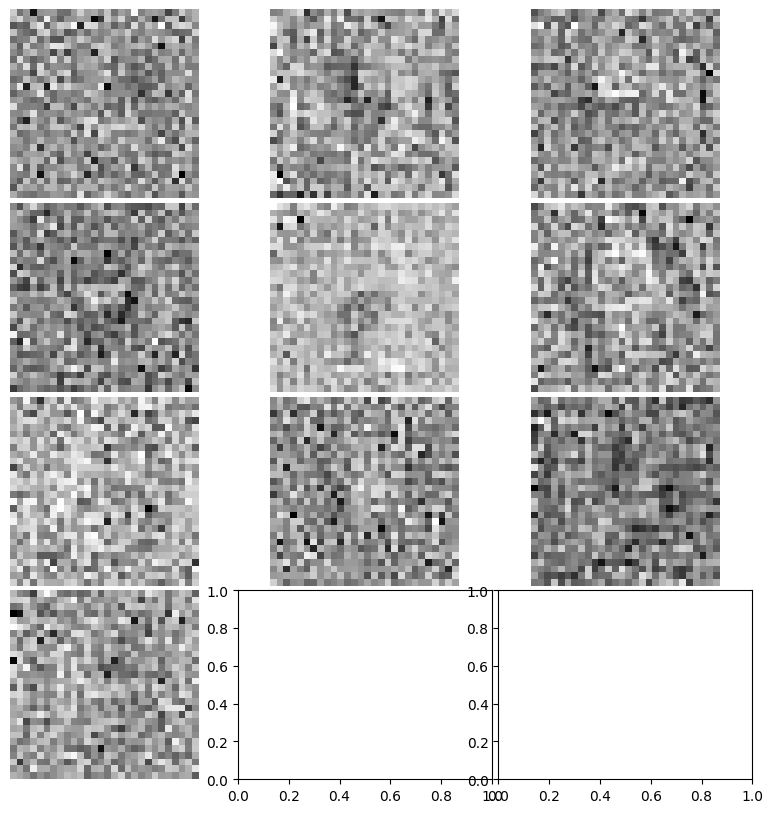

In [ ]:
# Visualizar Theta1 sin la columna de intercepto (bias)
Theta1_subset = Theta1[:, 1:]  # Seleccionar solo las columnas relevantes de Theta1
mostrarDatos(Theta1_subset)
# plt.title('Pesos de la Capa Oculta (Theta1)')
# plt.show()

## Visualizar algunas imágenes con sus etiquetas reales y predicciones

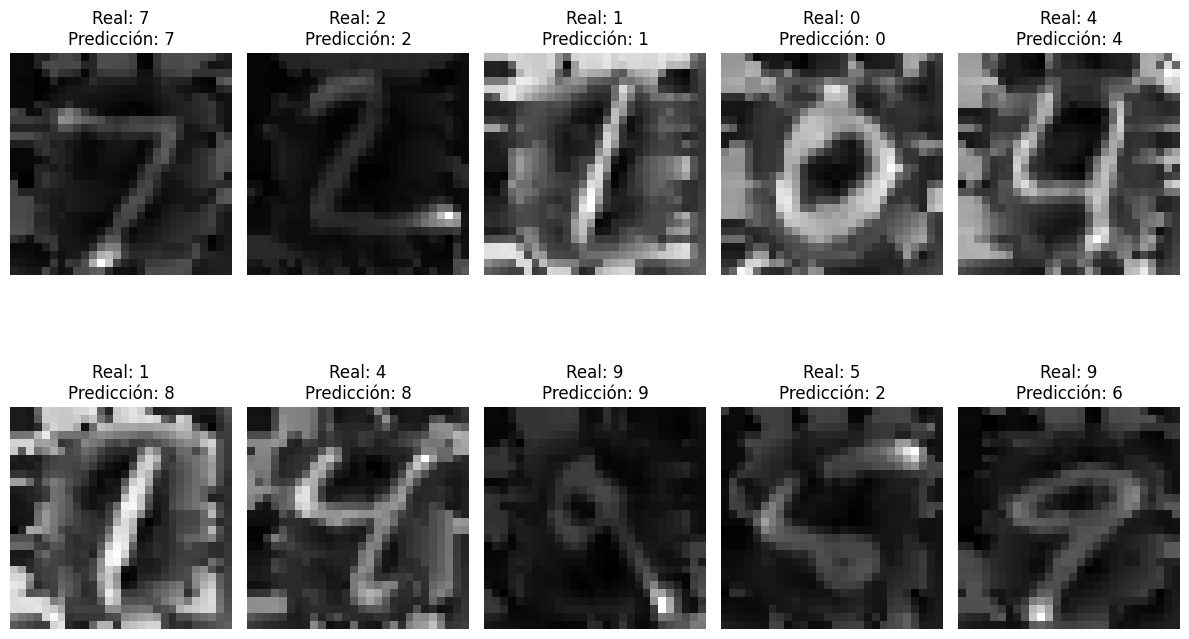

In [ ]:
num_images = 10  # Número de imágenes a visualizar

plt.figure(figsize=(12, 8))
for i in range(num_images):
    plt.subplot(2, num_images // 2, i + 1)
    plt.imshow(X_test_norm[i].reshape(28, 28), cmap='gray')
    plt.title(f'Real: {y_test[i]}\nPredicción: {pred[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

El label predicho es: [0]


<ipython-input-16-58a35b02185a>:6: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


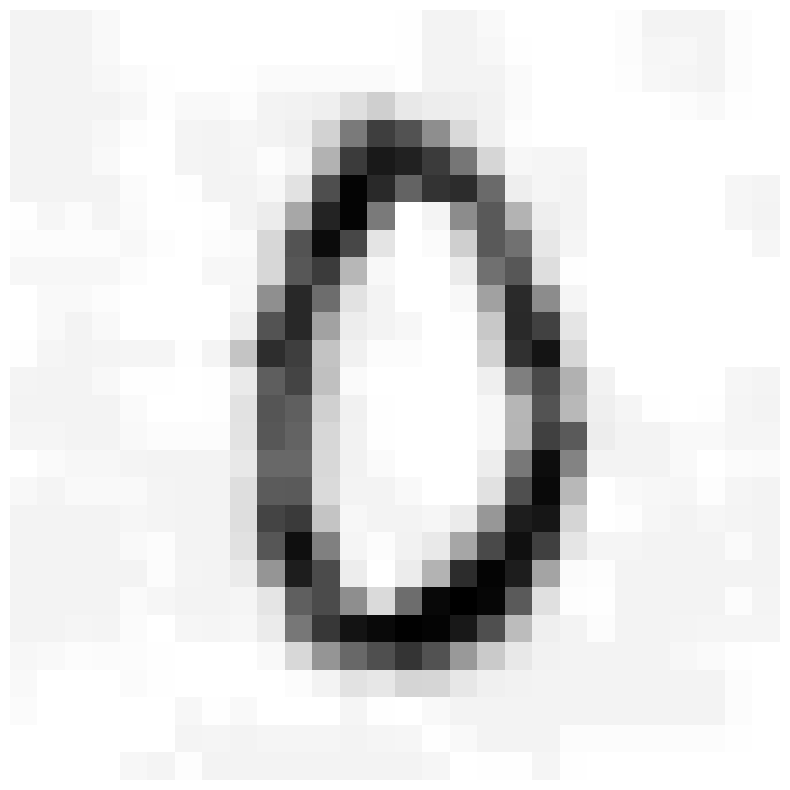

In [ ]:

# Obtener un índice aleatorio dentro del rango de X_test
random_index = np.random.randint(0, len(X_test))

# Seleccionar la muestra aleatoria de X_test usando el índice aleatorio
XPrueba = X_test.iloc[random_index:random_index+1, :].copy()

# Agregar una columna de unos para el término de sesgo (bias)
XPrueba = np.concatenate([np.ones((1, 1)), XPrueba], axis=1)

# Calcular la predicción usando tu modelo y Theta1
p = np.argmax(sigmoid(XPrueba.dot(Theta1.T)), axis=1)

# Mostrar la etiqueta predicha
print(f"El label predicho es: {p}")

# Mostrar la imagen correspondiente utilizando la función displayData
displayData(X_test.iloc[random_index:random_index+1, :])


In [ ]:
def predict(Theta1, Theta2, X):
    # Asegurar que X tenga las dimensiones adecuadas (agregar una dimensión si es necesario)
    if X.ndim == 1:
        X = X.reshape(1, -1)  # Convertir a una matriz de una fila si es un vector

    # Obtener el número de ejemplos en X
    m = X.shape[0]

    # Calcular la primera capa de activación
    h1 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), X], axis=1), Theta1.T))

    # Calcular la segunda capa de activación (salida)
    h2 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), h1], axis=1), Theta2.T))

    # Obtener las predicciones (índices de la clase más probable)
    predictions = np.argmax(h2, axis=1)

    return predictions


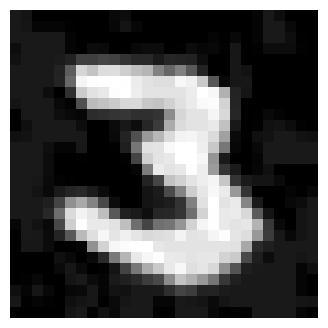

Predicción de la red neuronal: [3]


<ipython-input-16-58a35b02185a>:6: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


In [ ]:

# Verifica si X_test es un DataFrame válido
if X_test is None or len(X_test) == 0:
    print('X_test no está definido o está vacío.')
else:
    # Obtén un índice aleatorio dentro del rango de X_test
    random_index = np.random.randint(0, len(X_test))

    # Muestra la imagen correspondiente utilizando displayData
    try:
        sample_image = X_test.iloc[random_index].values.reshape(28, 28)  # Obtén la imagen como matriz numpy
        plt.figure(figsize=(4, 4))
        plt.imshow(sample_image, cmap='gray')
        plt.axis('off')
        plt.show()

        # Realiza la predicción utilizando la función predict con Theta1 y Theta2
        sample_data = X_test.iloc[random_index].values
        pred = predict(Theta1, Theta2, sample_data)

        # Imprime la predicción de la red neuronal
        print('Predicción de la red neuronal:', pred)
    except KeyError as e:
        print(f'Error al acceder a la fila en X_test: {e}')


#**Informe sobre el Red Neuronal - Regresión Logística Multiclase**

##**Introducción**

El objetivo de este experimento es implementar y entrenar una red neuronal, utilizando el conjunto de datos MNIST, que contiene imágenes de dígitos escritos a mano. Lo que hemos conseguido de aprender es como realizar con el proceso de construcción y entrenamiento de una red neuronal desde cero, comprendiendo la arquitectura básica y los principios de optimización.

En este laboratorio utilizamos una red neuronal con una arquitectura simple de dos capas (una capa oculta) para abordar el problema de clasificación de dígitos del dataset de MNIST que tienen clases de números del 0 al 9.

##**Descripción del Modelo**:

La red neuronal que implementamos consta de una capa de entrada (input_layer_size) que toma imágenes de 28x28 píxeles ( que son un total de 784 características), tiene una capa oculta (hidden_layer_size) con 10 unidades o neuronas y una capa de salida con 10 unidades correspondientes a las clases de dígitos del 0 al 9 (num_labels).
La capa de entrada se conecta a la capa oculta y la capa oculta se conecta a la capa de salida mediante matrices de pesos calculados donde se almacenaron en las variables de (Theta1 y Theta2).

##**Inicialización de Parámetros**:

En el modelo de red nueronal al construir la arquitectura sobre los pesos (Theta1 y Theta2) estos parámetros deben inicializarse de manera aleatoria esto para romper la simetría y permitir el entrenamiento del modelo se adecuado de la red neuronal.

##**Entrenamiento del Modelo**:

Antes del proceso de entrenamiento se tuvo que realizar la normalización de los datos de entrenamiento y de prueba, ya que permite que los datos esten en una sola escala de valores, esto para el modelo sea más convergentes en el proceso de entrenamiento.

En el proceso del entrenamiento del modelo se utilizó una función de costo basada en la función de costo de una red neuronal ya aplaicando con la  regularización L2 (lambda_) para evitar el sobreajuste.
El modelo se entrenó utilizando el método de minimización del costo mediante el método TNC (Truncated Newton Conjugate Gradient) proporcionado por scipy.optimize.

Durante el entrenamiento del modelo, se ajustaron los hiperparámetros como el número de iteraciones (maxiter), el valor de lambda y otros parámetros específicos del método de optimización.

##**Resultados**

El modelo entrenado mostró una precisión final del 74.44% en el conjunto de prueba, en este proceso de relaizar las pruebas de predicciones y calcular la precición se tuvo que probar varias veces el proceso de entrenamiento ya que tuvo una demora en el entrenamiento donde lo máximo que se pudo calcular el valor de la presición del modelo fué un valor de 74.44%, lo que indica una capacidad de clasificación razonable para el problema de clasificación de dígitos MNIST.

##**Análisis de Resultados**

##Discusión sobre la Precisión:
La precisión del modelo es 74.44% es una métrica sólida, considerando la simplicidad de la arquitectura de la red neuronal utilizada.
La precisión que pudimos obtener demuestra la capacidad del modelo para reconocer y clasificar dígitos escritos a mano de manera efectiva, aunque no fue la mejor pero es una valor de presición que más alto se pude obtener en las pruebas.

##**Mejores Configuraciones de Parámetros e Hiperparámetros**:

**hidden_size**: El parámetro de hidden_size que es la cantidad de neuronas que contiene la capa oculata, sobre este parámetro tuvimos que trabajar solo con 10 neuronas en la capa oculta esto debido a que con muchas mas nueronas en el proceso de entrenamiento se mostró que habia un sobreajuste el los pesos y además el tiempo del entrenamiento demoraba mucho más por lo tanto trabajamos solo con 10 neuronas en la capa oculta como valor óptimo.

**lambda**: Durante el proceso de construcción y entrenamiento del modelo, se observó que ajustar el valor de ***lambda*** tuvo un impacto significativo en la capacidad del modelo para generalizar, donde se tuvo que realizar las pruebas con diferentes valores de lambda, ya que con valores altos los pesos se inflaban mas por lo que se un valor optimo que se pudo utilizar para el valor de lambda es de 0.1.

**maxiter**: Las configuraciones óptimas de hiperparámetros incluyeron un número moderado de iteraciones (maxiter) y un valor de lambda que equilibraba el sesgo y la varianza del modelo. En caso del hiperparámetro maxiter tambien tuvo que probar con diferentes valores, ya que con numero de iteraciones como 100 o 200, etc el modelo demoraba más en el proceso de entrenamiento en este caso se tuvo que reducir el numero de iteraciones por lo que el valor optimo para maxiter fue 50.


##**Conclusiones**

En conclusión, en el laboratorio de redes neuronales se demostró la efectividad de una red neuronal simple para abordar el problema de clasificación de dígitos MNIST. Aunque se logró obtener una precisión razonable de 74.44%, Donde se hicienron las evaluaciones y pruebas con los datos de prueba, tambien hubo comparación con los datos reales y con los datos predichos y imprimirlos los resultados obtenidos. Pueden existir mejores formas de cómo mejorar el rendimiento del modelo.

##**Logros y Limitaciones**:

Se pudo lograr de implementar con éxito la red neuronal sobre el modelo de regresión logística multiclase y se pudo obtener una precisión del 74.44% en la clasificación de dígitos MNIST.
Sin embargo, las limitaciones incluyen la simplicidad de la arquitectura utilizada y la necesidad de explorar configuraciones más complejas para mejorar aún más la precisión.